<a href="https://colab.research.google.com/github/srgdesouza/general/blob/main/Blog_Self_Attention_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

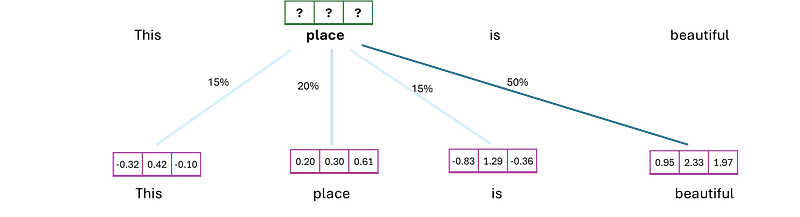

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

word_mapping = {
    'word1': 'this',
    'word2': 'place',
    'word3': 'is',
    'word4': 'beautiful'
}

print(word_mapping)

# Definindo os vetores de entrada word1, word2, x3
word1 = np.array([-0.32 , 0.42, -0.1 ])
word2 = np.array([ 0.2,  0.3 , 0.61])
word3 = np.array([-0.83 , 1.29 ,-0.36])
word4= np.array([ 0.95 , 2.33 , 1.97])
dim=len(word1)
# Calculating similarity scores with respt to word2
score_21 = np.dot(word2, word1)/np.sqrt(dim)
score_22 = np.dot(word2, word2)/np.sqrt(dim)
score_23 = np.dot(word2, word3)/np.sqrt(dim)
score_24 = np.dot(word2, word4)/np.sqrt(dim)

scores= np.array([score_21, score_22, score_23,score_24])
print("Scores with respect to word 2:",  np.round(scores,2))

# Applying softmax às to scores
exp_scores = np.exp(np.array([score_21, score_22, score_23,score_24]))
softmax_scores = exp_scores / np.sum(exp_scores)
print("Normalized similarity scores:", softmax_scores)
weights_word2= softmax_scores*100



{'word1': 'this', 'word2': 'place', 'word3': 'is', 'word4': 'beautiful'}
Scores with respect to word 2: [0.   0.29 0.   1.21]
Normalized similarity scores: [0.14975737 0.20000186 0.14979196 0.50044881]


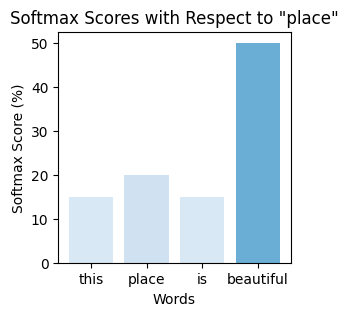

In [60]:


# bar graph of softmax_scores
labels = [word_mapping[label] for label in ['word1', 'word2', 'word3', 'word4']]

# Normalize softmax scores to be between 0 and 1 for color mapping


# Use a blue colormap (e.g., 'Blues') to map normalized scores to colors
colors = plt.cm.Blues(softmax_scores)

plt.figure(figsize=(3, 3))
plt.bar(labels, weights_word2, color=colors)
plt.xlabel('Words')
plt.ylabel('Softmax Score (%)')
plt.title(f'Softmax Scores with Respect to "{word_mapping["word2"]}"')
plt.show()

In [61]:
# Calculing updated representation of "place"
word2_updated = softmax_scores[0] * word1 + softmax_scores[1] * word2 + softmax_scores[2] * word3 + softmax_scores[3] * word4
print("word2_updated:", np.round(word2_updated,2))

#Calculate a1

word2_updated: [0.34 1.48 1.04]


In [62]:
# Calculate scores with respect to word1
score_11 = np.dot(word1, word1) / np.sqrt(dim)
score_12 = np.dot(word1, word2) / np.sqrt(dim)
score_13 = np.dot(word1, word3) / np.sqrt(dim)
score_14 = np.dot(word1, word4) / np.sqrt(dim)

scores_word1 = np.array([score_11, score_12, score_13, score_14])
print("Scores with respect to word 1:", np.round(scores_word1, 2))

# Applying softmax to scores with respect to word1
exp_scores_word1 = np.exp(scores_word1)
softmax_scores_word1 = exp_scores_word1 / np.sum(exp_scores_word1)
weights_word1= softmax_scores_word1*100

print("Normalized sim scores with respect to word 1:", softmax_scores_word1)

Scores with respect to word 1: [0.17 0.   0.49 0.28]
Normalized sim scores with respect to word 1: [0.23044251 0.19516396 0.31741176 0.25698177]


##**The top box in the diagram below contains the updated vector we have just calculated.**

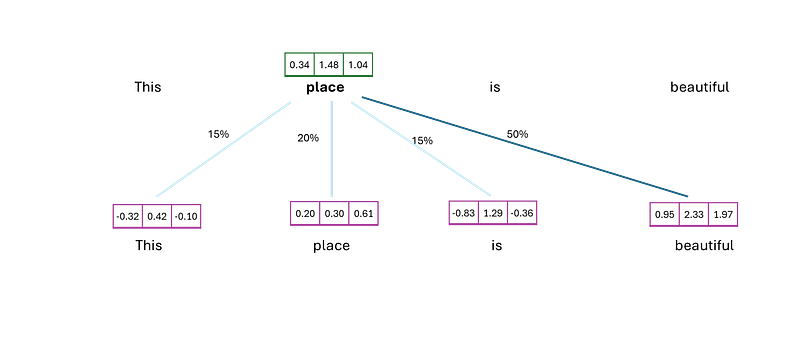

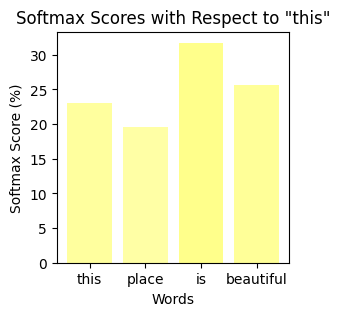

In [63]:
# bar graph of softmax_scores
labels = [word_mapping[label] for label in ['word1', 'word2', 'word3', 'word4']]


# Criar um colormap personalizado com tons exclusivamente amarelos
yellow_cmap = LinearSegmentedColormap.from_list("pure_yellow", ["#ffffcc", "#ffff00"])
colors = yellow_cmap(softmax_scores_word1)

plt.figure(figsize=(3, 3))
plt.bar(labels, weights_word1, color=colors)
plt.xlabel('Words')
plt.ylabel('Softmax Score (%)')
plt.title(f'Softmax Scores with Respect to "{word_mapping["word1"]}"')
plt.show()

In [64]:
# Calculing updated representation of word1
word1_updated = softmax_scores_word1[0] * word1 + softmax_scores_word1 [1] * word2 + softmax_scores_word1 [2] * word3 + softmax_scores_word1[3] * word4
print("word1_updated:", np.round(word1_updated,2))

word1_updated: [-0.05  1.16  0.49]


In [65]:
# Calculate scores with respect to word3
score_31 = np.dot(word3, word1) / np.sqrt(dim)
score_32 = np.dot(word3, word2) / np.sqrt(dim)
score_33 = np.dot(word3, word3) / np.sqrt(dim)
score_34 = np.dot(word3, word4) / np.sqrt(dim)

scores_word3 = np.array([score_31, score_32, score_33, score_34])
print("Scores with respect to word 3:", np.round(scores_word3, 2))

# Applying softmax to scores with respect to word3
exp_scores_word3 = np.exp(scores_word3)
softmax_scores_word3 = exp_scores_word3 / np.sum(exp_scores_word3)

print("Normalized sim scores with respect to word 3:", softmax_scores_word3)

word3_updated = softmax_scores_word3[0] * word1 + softmax_scores_word3[1] * word2 + softmax_scores_word3[2] * word3 + softmax_scores_word3[3] * word4

Scores with respect to word 3: [0.49 0.   1.43 0.87]
Normalized sim scores with respect to word 3: [0.17670603 0.10867465 0.45526518 0.25935414]


In [66]:
# Calculate scores with respect to word4
score_41 = np.dot(word4, word1) / np.sqrt(dim)
score_42 = np.dot(word4, word2) / np.sqrt(dim)
score_43 = np.dot(word4, word3) / np.sqrt(dim)
score_44 = np.dot(word4, word4) / np.sqrt(dim)

scores_word4 = np.array([score_41, score_42, score_43, score_44])
print("Scores with respect to word 4:", np.round(scores_word4, 2))

# Applying softmax to scores with respect to word4
exp_scores_word4 = np.exp(scores_word4)
softmax_scores_word4 = exp_scores_word4 / np.sum(exp_scores_word4)

print("Normalized scores with respect to word 4:", softmax_scores_word4)

# Calculing updated representation of word4

word4_updated = softmax_scores_word4[0] * word1 + softmax_scores_word4[1] * word2 + softmax_scores_word4[2] * word3 + softmax_scores_word4[3] * word4

print("word3_updated:", np.round(word3_updated, 2))
print("word4_updated:", np.round(word4_updated, 2))



Scores with respect to word 4: [0.28 1.21 0.87 5.9 ]
Normalized scores with respect to word 4: [0.00355452 0.00902091 0.00644383 0.98098074]
word3_updated: [-0.17  1.3   0.4 ]
word4_updated: [0.93 2.3  1.94]


##**The top box in the diagram below contains the updated vectors we have just calculated.**
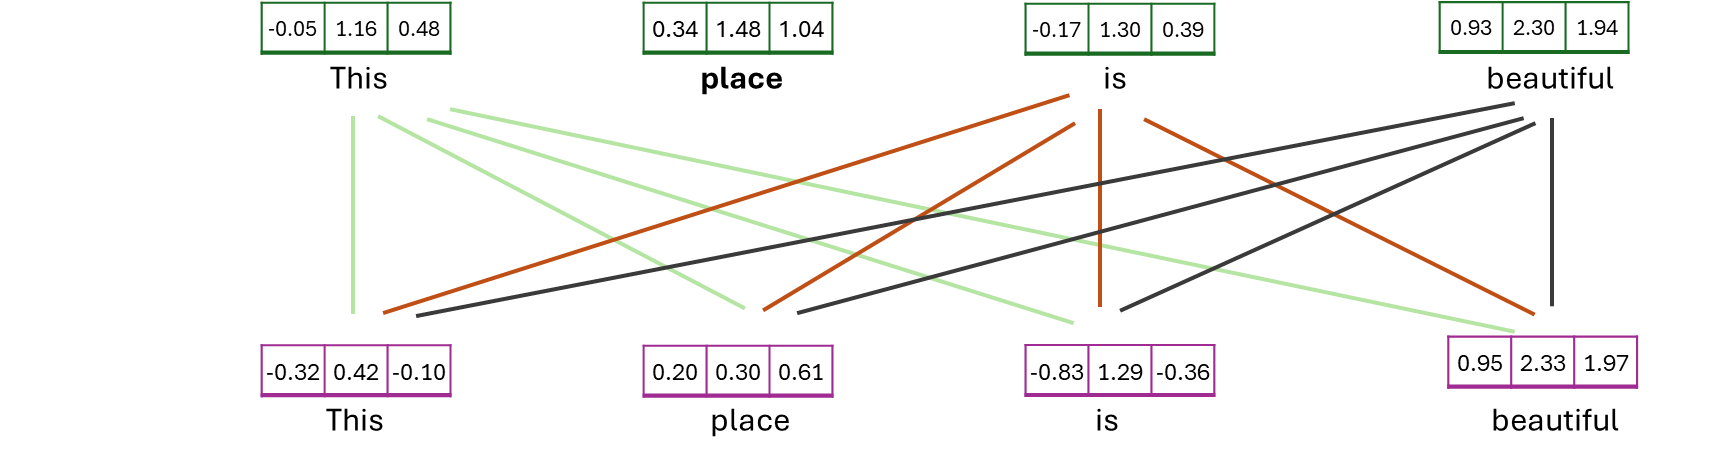

In [67]:
# Stack the attention outputs horizontally
attention_outputs = np.round(np.vstack((word1_updated, word2_updated, word3_updated, word4_updated)), 2)

print("Stacked attention outputs (horizontally):")
print(attention_outputs)

Stacked attention outputs (horizontally):
[[-0.05  1.16  0.49]
 [ 0.34  1.48  1.04]
 [-0.17  1.3   0.4 ]
 [ 0.93  2.3   1.94]]


## Challenge: Can you do all these calculations **at once** using matrices?